# 量子画像の柔軟な表現（FRQI）

画像処理は顔認証や自動運転のように急拡大中の市場において非常によく利用されています。それと同時に量子画像処理も現在台頭しつつある量子情報の一分野で、エッジ検出のように特定ではあるものの広く利用されている技術を大きく加速させる可能性を秘めています。[3], [4]。例えば2014年のZhang et al.では量子画像の柔軟な表現(FRQI)と古典エッジ抽出アリゴリズムであるSobelを元にした量子エッジ抽出アルゴリズム (QSobel)が提唱されています。 QSobelは$2^{n} × 2^{n}$サイズのFRQI量子画像に対して$O(n^{2})$の計算複雑性でエッジを抽出可能であり、既存のエッジ抽出アルゴリズムを比較すると指数関数的加速となっています。 [3]

この章では画像を量子状態にエンコードする手法としてFlexible 量子画像の柔軟な表現 (FRQI)とデジタル画像用の新しい拡張量子表現 (NEQR)の2つの手法を取り上げます。画像のエンコードが完了してしまえばQSobel [3]エッジ抽出アリゴリズムなどの量子アルゴリズムを使って画像処理が可能ですが、ここではエンコーディングについてのみ取り上げます。

量子画像の柔軟な表現（FRQI）[1]の目標は、古典的なデータを量子状態に効率的にエンコードし、その後画像処理操作に演算子を使用できるようにする画像の量子表現を提供することです。この場合、古典的な画像を量子状態にエンコードするには、多項式オーダーの数の単純なゲートが必要です[2]。

## 1.FRQI状態

画像を表す量子状態は次のとおりです。

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
\ket{I(\theta)}=\frac{1}{2^{n} }\sum_{i=0}^{2^{2n}-1}\left(\cos \theta_{i}\ket{0}+\sin\theta_{i}\ket{1}\right)\otimes\ket{i}
\label{eq:FRQI_state} \tag{1.1}
$$

$$
 \theta_{i}\in\left[ 0,\frac{\pi}{2}\right], i = 0,1,\cdots,2^{2n}-1
 \label{eq:FRQI_angle} \tag{1.2}
$$

FRQI状態は、方程式 $\eqref{eq:FRQI_state}$ において、 $\left|I(\theta)\right|=1$ であるように規格化された状態で、2つの部分で構成されています。

* 色の情報をエンコードした状態: $\cos\theta_{i}\ket{0}+\sin\theta_{i}\ket{1}$
* 関連ピクセルの位置をエンコードした状態: $\ket{i}$

シンプルな例として、$2\times2$の画像の角度$\theta$(色情報をエンコード)と関連するケットベクトル(位置情報のエンコード)を以下に示します。

$$
\begin{array}{|c|c|}
\hline
\theta_{0},\ket{00} & \theta_{1},\ket{01}  \\
\hline
\theta_{2},\ket{10} & \theta_{3},\ket{11} \\
\hline
\end{array}
$$

そして、同等の量子状態は

$$
\begin{aligned}
\ket{I}=\frac{1}{2}[ \; & \phantom{+} \left(\cos\theta_{0}\ket{0}+\sin\theta_{0}\ket{1} \right)\otimes\ket{00}&\\
& + \left(\cos\theta_{1}\ket{0}+\sin\theta_{1}\ket{1} \right)\otimes\ket{01} \\
& + \left(\cos\theta_{2}\ket{0}+\sin\theta_{2}\ket{1} \right)\otimes\ket{10}\\
& + \left(\cos\theta_{3}\ket{0}+\sin\theta_{3}\ket{1} \right)\otimes\ket{11} \;]
\end{aligned}
\label{eq:22state} \tag{1.3}
$$

## 2. FRQI状態の構築：2段階のプロセス

初期状態 $\ket{0}^{\otimes2n+1}$ から式 $\eqref{eq:FRQI_state}$ のFRQI状態を構築するためには2つのステップが必要で、まず始めに量子系を完全に重ね合わせの状態にする必要があります。ただし、最後の量子ビットだけは色情報をエンコードするために使用するため重ね合わせの対象から外します。 $H^{\otimes2n}$ は $2n$ 個のアダマールゲートのテンソル積であり、中間状態は以下のようになります。

$$
\ket{H}=\frac{1}{2^{n} }\ket{0}\otimes\sum_{i=0}^{2^{2n}-1}\ket{i}=\mathcal{H}\left(\ket{0}^{\otimes2n+1}\right)
\label{eq:superpos} \tag{2.1}
$$

[1]にあるように、初期状態 $\ket{0}^{\otimes2n+1}$ からFRQI状態 $I(\theta)$ に変換するためのユニタリー変換 $\mathcal{P}=\mathcal{RH}$ が存在します。

$$
\mathcal{R}\ket{H}=\left(\prod_{i=0}^{2^{2n}-1}R_{i}\right)\ket{H}=\ket{I(\theta)}
\tag{2.2}
$$

$R_{i}$ 操作は次のように定義される制御回転行列です。

$$
R_{i}=\left( I\otimes \sum^{2^{2n}-1}_{j=0,j\neq i}\ket{j}\bra{j}\right) + R_{y}\left(2\theta_{i}\right)\otimes\ket{i}\bra{i} \tag{2.3}
$$

$R_{y}(2\theta_{i})$ は通常の回転行列です。

$$
R_{y}(2\theta_{i})=
\begin{pmatrix}
\cos\theta_{i} & -\sin\theta_{i}\\
\sin\theta_{i} & \cos\theta_{i} 
\end{pmatrix} \tag{2.4}
$$

制御回転は通常の回転ゲートと $CNOT$ ゲートで書き下される一般化された $C^{2n}\left( R_{y}(2\theta_{i}) \right) $ で実装することが出来ます。
例えば$n=1$の$4$ ピクセル ( $2\times2$ の画像)の場合、次のように表現が可能であり簡単に実装が可能です。

![回路の同等性](images/circ_eq.png)

ここでピクセル位置の増大には配慮する必要はありますが、これは $X$ ゲートの役割です。

## 3.  実装と測定 : 2×2のグレースケール画像

バリアは個々のピクセルに関連する別々のブロックを区別するために使われます。<br>またグレースケール画像(LRGB画像のLの要素)という、色情報のエンコードのため関心のある値が強度のみの画像を用います。つまり、全ての$\theta_{i}$の値が0の場合全てのピクセルが黒で、全ての$\theta_{i}$の値が$\pi/2$の場合全てのピクセルが白となります。この時関心のある値は$0, \pi/4$ そして$\pi/2$です。

### 3.1 例 1 :  $\theta_{i}=0, \forall i$  - 全ピクセルが最小強度


In [1]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

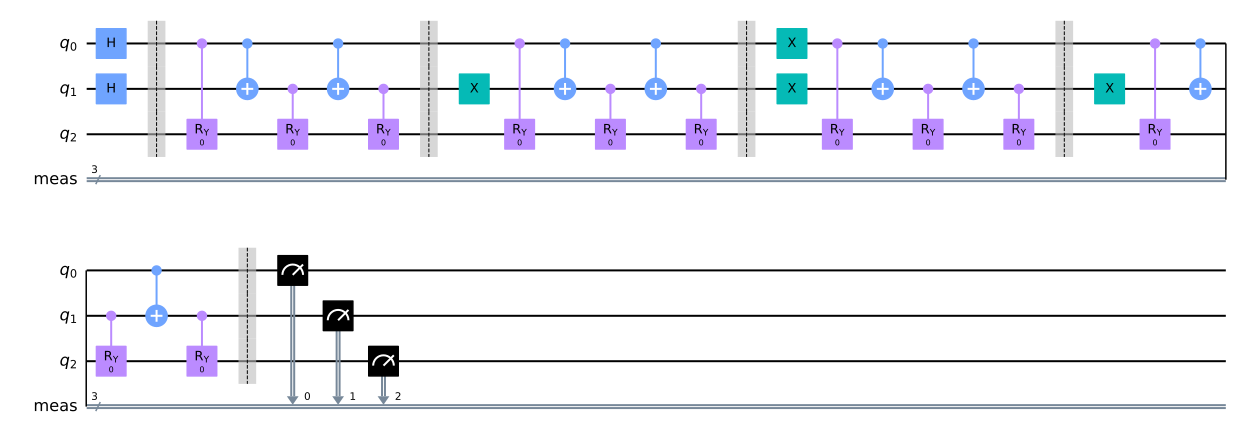

In [2]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

#### 3.1.1 測定と画像検索

$\eqref{eq:22state}$からFRQI状態のカラーエンコーディングの部分で状態$\ket{1}$に関わる全ての項は、$\theta=0$により消えてしまうので、等確率な$4$状態のみ観測が期待されます。

{'001': 1044, '000': 998, '010': 1027, '011': 1027}


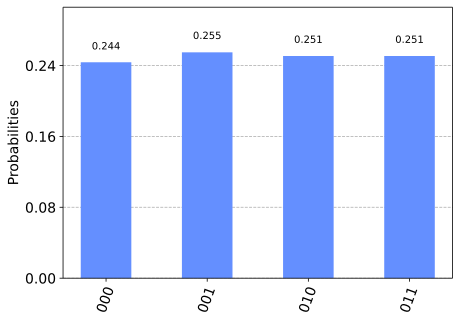

In [3]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

### 3.2 例2 :  $\theta_{i}=\pi/2, \forall i$  - 全てのピクセルが最大強度

回路は$\theta$の値を除いて最初に定義した回路と同一です。

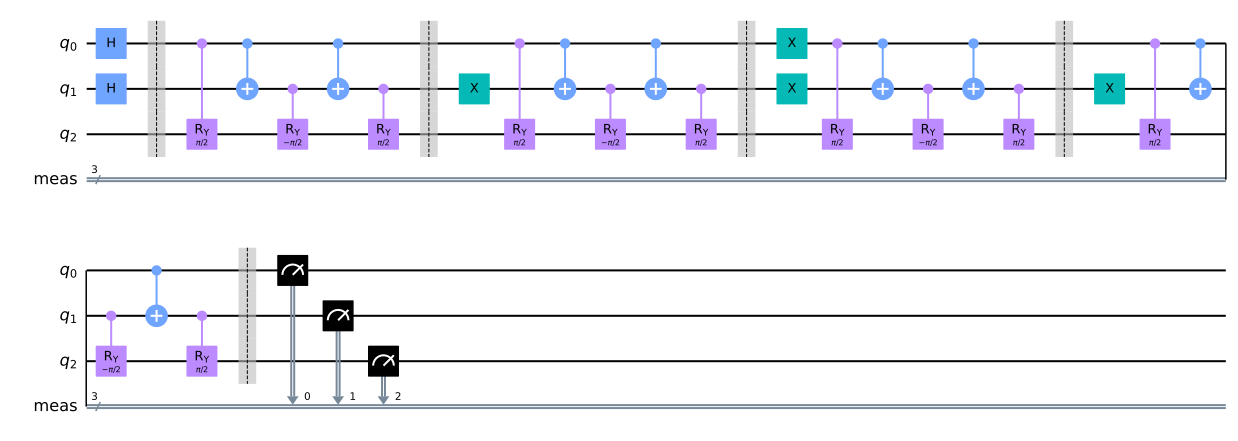

In [4]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw()

#### 3.2.1 測定と画像検索

今回の場合$\eqref{eq:22state}$において$\cos$の項が消えてしまうため、最初の量子ビットの状態が「1」である等確率な4状態が観測されます。

{'100': 1041, '110': 993, '101': 1037, '111': 1025}


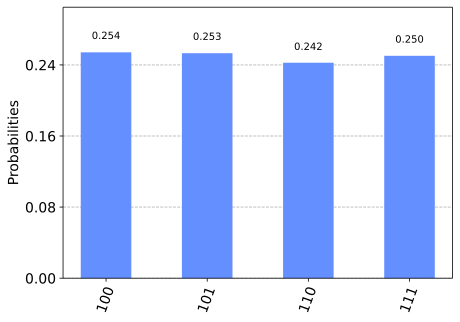

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc1 = transpile(qc1, aer_sim)
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

### 3.3 例3 :   $\theta_{i}=\pi/4, \forall i$  - 全てのピクセルが $50\%$ の強度

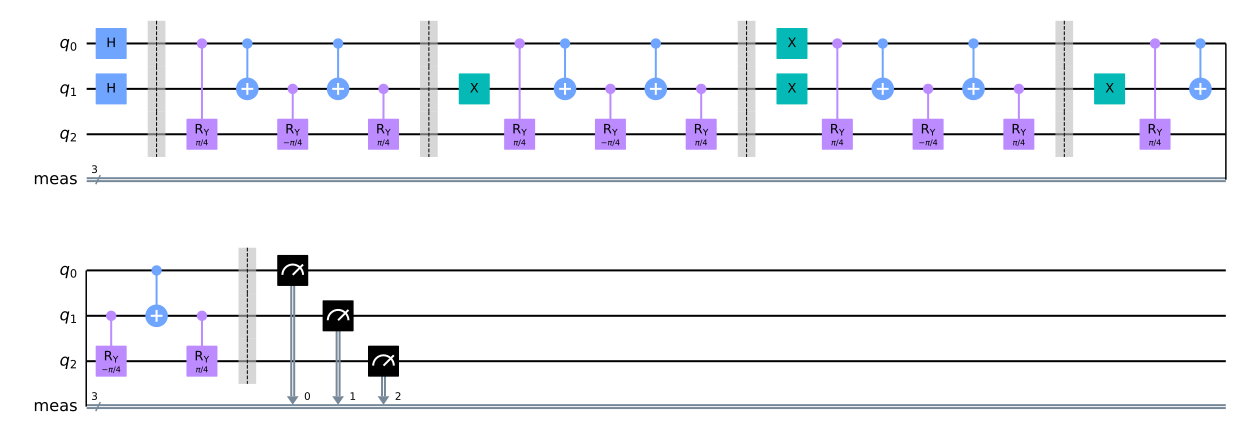

In [6]:
theta = pi/4  # all pixels white
qc2 = qk.QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()
#Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()
#Pixel 2

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)


qc2.barrier()

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw()

#### 3.3.1 測定と画像検索

今回の場合は8状態全ての観測が期待されます。

{'110': 492, '100': 499, '001': 501, '000': 512, '010': 548, '111': 508, '011': 546, '101': 490}


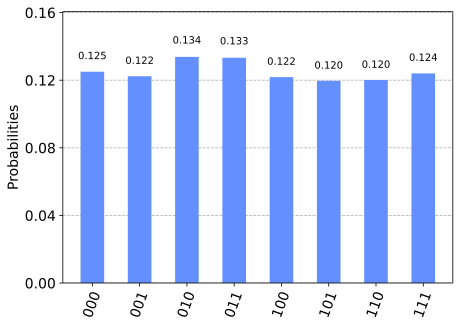

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc2 = transpile(qc2, aer_sim)
qobj = assemble(t_qc2, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc2)
print(counts)
plot_histogram(counts)

## 4. 回路の分析と実機での実行

これまでの回路の違いは回転角$\theta$だけだったので、このクラスの回路(2×2画像)の深さや必要なゲート数を確認することが出来ます。

### 4.1 回路の分析

例として  $\theta_{i}=\pi/2, \forall i$  (全てのピクセルが最大強度)の場合の回路を考えてみましょう。

In [8]:
print("Depth: ", qc1.depth())
print("Operations: ", qc1.count_ops())

Depth :  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


それほど複雑には見えませんが、トランスパイラーで展開しようとすると少しだけより複雑になります。

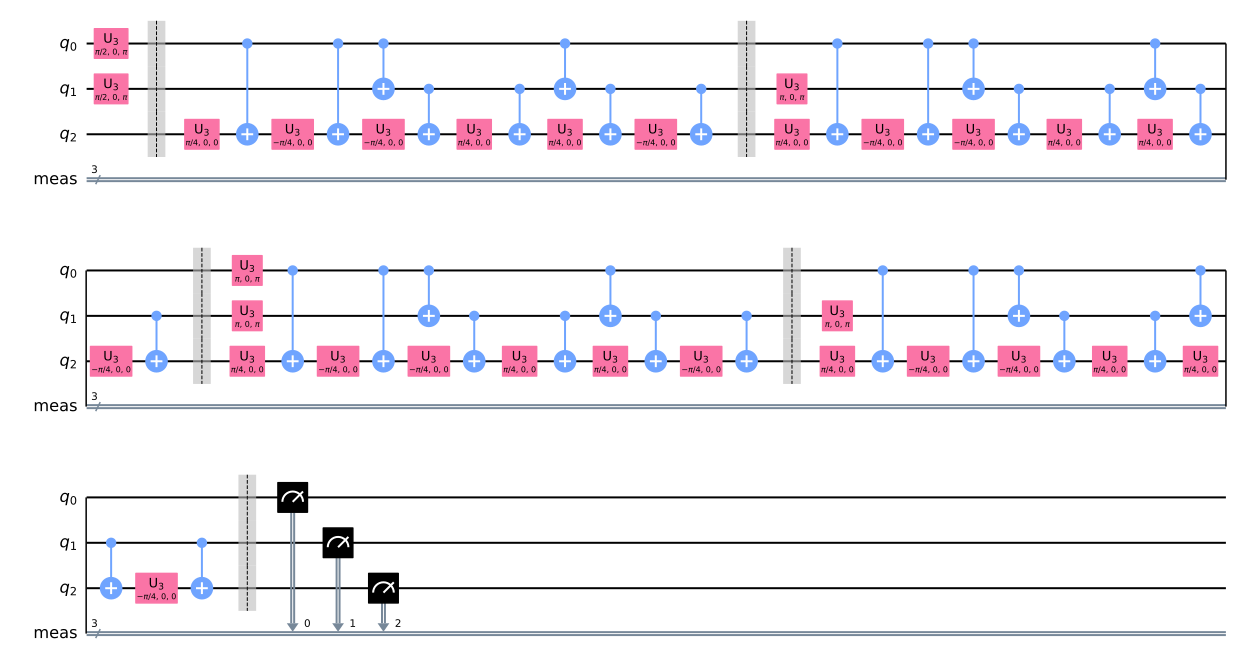

In [9]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw()

In [10]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


例で挙げた回路の深さは倍になりました！

デバイスのcoupling map(例: Athens)を使ってトランスパイルした結果は実機で実行する回路により近づきました。最適化レベルを3にしてみましょう。

In [11]:
from qiskit.providers.fake_provider import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 73), ('sx', 66), ('cx', 55), ('barrier', 5), ('x', 3), ('measure', 3)])
depth =  156


### 4.2 実機での実行

実機で実行する準備が整いました。ここでは(fake)Athensを使いますが、実機でも同じコードを実行可能です。

{'011': 242, '111': 801, '100': 668, '110': 768, '001': 251, '000': 284, '010': 305, '101': 777}


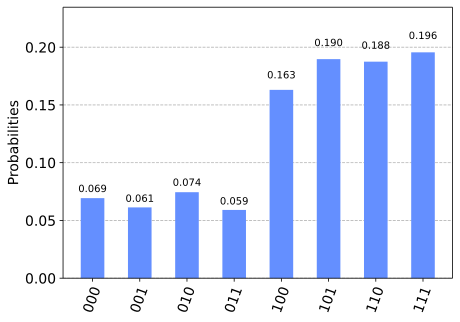

In [12]:
t_qc1 = transpile(qc1, fake_athens, optimization_level=3)
qobj = assemble(t_qc1, shots=4096)
result = fake_athens.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

得られた結果はデバイスのノイズのせいで期待した結果とはなっていません。理想的な回路のシミュレーションは以下のようになります。

{'100': 1013, '111': 1017, '110': 1074, '101': 992}


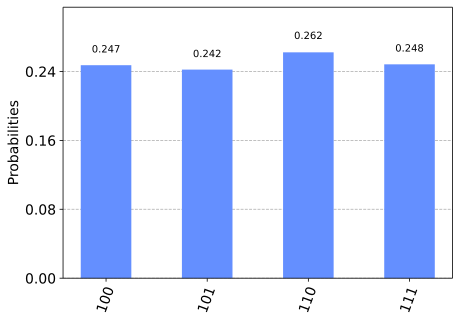

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

## 5. 圧縮

エンコードする画像が大きくなってエンコード用の量子回路の深さが深くなるほど、回路の複雑さ($CNOT$ゲートの深さや数)を減らすためのいかなる取り組みも大きな差を生み出すことは明らかです。

圧縮はピクセルを同じ強度でグルーピングすることで実現することが出来ます。それぞれのピクセルを区別するのは位置をエンコードするバイナリ文字列ですが、制御回転の回転角は共通しています。次のような画像の例を考えてみましょう。

![8x8 2色の画像](images/8x8_2col.png)

青のピクセルの位置は$\ket{0}, \ket{8}, \ket{16}, \ket{24}, \ket{32}, \ket{40}, \ket{48}$ そして $\ket{56}$に対応します。各々のバイナリ表現とブール表現は以下のようになります。

$$
\begin{array}{|c|c|c|}
\hline
position & binary \; string & boolean \; expression \\
\hline
\ket{0} &\ket{000000} & \overline{x_{5}}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{8} &\ket{001000} & \overline{x_{5}}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{16} &\ket{010000} & \overline{x_{5}}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{24} &\ket{011000} & \overline{x_{5}}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{32} &\ket{100000} & x_{5}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{40} &\ket{101000} & x_{5}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{48} &\ket{110000} & x_{5}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{56} &\ket{111000} & x_{5}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\end{array}
$$

ブール表現は簡略化、最小化することで次のように表現されます。

$exp = \overline{x_{5}}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+\overline{x_{5}}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+\overline{x_{5}}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+\overline{x_{5}}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}$

$$
\begin{aligned}
exp&=(\overline{x_{5}}+x_{5})(\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}} +\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}})\\
       &=\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}(\overline{x_{4}}\overline{x_{3}}+\overline{x_{4}}x_{3}+x_{4}\overline{x_{3}}+x_{4}x_{3})\\
       &=\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}
\end{aligned}
$$

ピクセル群を1つの制御回転でグルーピング出来るだけでなく、制御ゲートも削減することが分かりました。これは実装に必要な単一ゲートが削減されることを意味します。 

## 練習問題

制御回転は一般化された$C^{2n}\left( R_{y}(2\theta_{i}) \right) $を用いて実装することができ、これは通常の回転ゲートと$CNOT$ゲートに分解することが出来ます。$n=2$ と $n=3$の場合、およびそれぞれ展開した結果を書き下してください。

今回扱ったのは通常のグレースケールの小さな画像ですが、通常のRGB画像(例えば16色)はどのように実装すればよいでしょうか。

## デジタル画像用の新しい拡張量子表現（NEQR）

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|}$

**デジタル画像用の新しい拡張量子表現** (NEQR)は量子画像表現のもう一つの形式です。NEQRは前の手法である量子画像の柔軟な表現 (FRQI)[1]と、画像中のピクセル情報を保存するために規格化された重ね合わせを用いるという点では似ています。FRQIはピクセルのグレースケール値を保存するのに1量子ビットしか利用しないという制限があり、このせいで複雑な画像変換を困難にしています。NEQRは画像のグレースケール値を保存するために、基底状態の量子ビット列を用いることで、FRQIを改善するように作られました[5]。

NEQRは[5]にあるようにFRQIと比べて以下のような利点があります。

- NEQR量子画像の準備に関して時間計算量において二次関数的な加速
- 最大1.5倍の最適な画像圧縮比率
- 測定後の正確な画像検索(FRQIでは確率的)
- 複雑な色の扱いやその他多数の操作が可能

この節ではNEQRモデルを用いて量子コンピューター上で2×2の古典グレースケール画像を表現していきます。

## 1. NEQRプロセス

NEQRで画像を表現する手順は準備と圧縮という二つのパートに分けられます。以下で説明します。

### 1.1 画像のエンコードの仕方:

NEQRモデルを利用して量子コンピューター上で画像を表現するために必要な様々な要素をまずは確認し、それらがどのように関連していくのかを見ていきます。最初は画像の色の範囲から始めましょう。

画像の色の範囲はビット文字列で次のように表されます:<br>バイナリ画像：1ビット表現 0=黒、1=白

![](images/flower_binary.png)

グレースケール画像：8ビット表現 0(黒)から255(白)のグレー強度値の陰影

![](images/flower_grey.png)

カラー画像：24ビット表現は8ビットが3グループに分けられ、各8ビットグループは赤、緑、青のピクセルの色の強度を表現しています。

![](images/flower.jpg)

この例では画像内の位置でピクセルを表現しています。2次元画像を表現しているため、画像の位置を行と列つまりY座標とX座標で定義しています。

**注意** 画像処理では、ピクセル位置はXY平面上と同じように表されます。そのため列番号は値Xで表され、行番号は値Yで表されます。

### 1.2 画像圧縮：

画像の量子表現が完了したら、作成された回路の深さとサイズを確認し、生成されたNEQR回路を圧縮するためのいくつかの古典的なオプションを提供します。

それでは以下で2×2の量子画像をエンコードしていきましょう。

## 2. 2×2 画像のエンコード

この例では以下のピクセル値を含むような2×2のグレースケール画像をエンコードします。下の表の1列目は2×2画像のピクセルの位置を、2列目はその位置におけるピクセル値の強度を、3列目はグレースケールの強度(例: 01100100 = 100)を表しています。

$$
\begin{array}{|c|c|c|}
\hline
position & binary \; string & grayscale \; intensity \\
\hline
\ket{00} &\ket{00000000} & 0 - Black  \\
\hline
\ket{01} &\ket{01100100} & 100 - Dark shade \\
\hline
\ket{10} &\ket{11001000} & 200 - Light shade  \\
\hline
\ket{11} &\ket{11111111} & 255 - White \\
\hline
\end{array}
$$

これらのピクセルをエンコードするために量子レジスタを定義する必要があります。最初のレジスタはピクセル位置を保存するために使用します。2次元画像なので、水平(列)方向と垂直(行)方向、つまりY方向とX方向の2変数が必要となります。

各ピクセルの色の値は $\mathcal{f}(Y,X)$ で表現します。YとXはピクセルの位置で、それぞれ画像の行方向と列方向にあたります。

各ピクセルのグレースケール強度域は変わり得ますが、最も一般的なグレースケール域は0 - 255なので値はたいてい$2^{q}$で表されます。256のとき $q=8$ です。 $q$ は色のバイナリ列 $C^{0}, C^{1},.. C^{q-2}, C^{q-1}$ を表現するために必要なビット数です。

これは各ピクセル値は次のように表現できることを表します。ここでCはグレースケール強度のバイナリ表現です。

$$
\mathcal{f}(Y,X) = C^{0}_{YX}, C^{1}_{YX},... C^{q-2}_{YX}, C^{q-1}_{YX} \in [0,1], \;\; f(Y,X)\in[0, 2^{q-1}]
\label{eq:color_rep} \tag{2.1}
$$

例えば位置(1,0)、色強度100 (01100100)のピクセルは次のように表されます。

$$
\mathcal{f}(1,0) = \overline{C^{0}_{10}}, C^{1}_{10}, C^{2}_{10}, \overline{C^{3}_{10}}, \overline{C^{4}_{10}}, C^{5}_{10}, \overline{C^{6}_{10}}, \overline{C^{7}_{10}} = 01100100 = 100
$$

ゆえに、 $2^{n}$ x $2^{n}$ 画像の量子表現の一般系 $|I\rangle$ は以下のように表されます。

$$
|I\rangle = \frac{1}{2^{n}}\sum_{Y=0}^{2^{2n-1}} \sum_{X=0}^{2^{2n-1}} | \mathcal{f}(Y,X)\rangle |Y X\rangle = \frac{1}{2^{n}}\sum_{Y=0}^{2^{2n-1}} \sum_{X=0}^{2^{2n-1}} \vert\otimes_{i=0}^{q-1}\rangle |C_{YX}^{i}\rangle |Y X\rangle
\label{eq:quantum_image_rep} \tag{2.2}
$$

上の式を先ほどの2×2画像の例に当てはめると、ピクセル値は以下のようになります。

$$
\mathsf{\Omega}_{YX}|0\rangle^{\otimes q} = \frac{1}{\sqrt[]{2}}(|00000000\rangle |00\rangle + |01100100\rangle |01\rangle + |11001000\rangle |10\rangle + |11111111\rangle |11\rangle)
$$

ここで $\mathsf{\Omega}_{YX}|0\rangle$ は位置(Y, X)のピクセルの値格納を表現する量子操作です。


### 2.1 画像エンコードの量子回路の作成

まずは画像をエンコードするために、ある量子ビット数の量子回路を作成します。そのために、**intensity**とラベリングされたピクセル値と**idx**とラベリングされたピクセル位置を表現する2つの別々の量子回路を構築していきましょう。

最初の量子回路は$2^n$個の量子ビットを使ってピクセル値$f(Y,X)$を表現します。今回の場合は8量子ビットです。

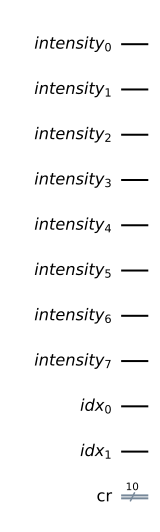

In [14]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

次にピクセル位置を表現する量子ビット(idx)にアダマールゲートを追加し、2×2画像の全ての位置を利用可能にします。<br>オプションとして強度を表現する量子ビットにはIゲートを追加します。 

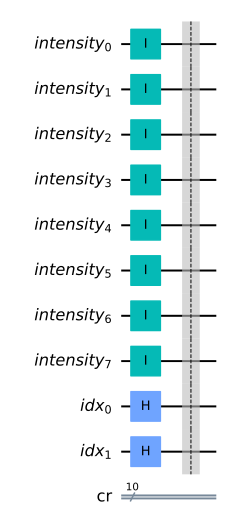

In [15]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

### 2.2 量子回路上でのグレースケール画像の表現

量子回路を構築し、初期化を行ったのでまずはピクセル位置を表現する回路とそれぞれのピクセル強度値を合わせた回路を準備していきましょう。<br>可読性を高めるためIゲートとバリアを追加しています。 

ピクセル値をエンコードしていきましょう。各ピクセルにセットした値は以下の通りであったことを思い出してください。

00 = 00000000 (黒)

01 = 01100100 (グレースケール = 100)

10 = 11001000 (グレースケール = 200)

11 = 11111111 (白)

(0,0)の位置のピクセルから始めていきます。(0,0)ピクセルは値が全て0のなのでブランクのままにしておくことももちろん可能ですが、見やすくするためにIゲートを追加している点に注意してください。 

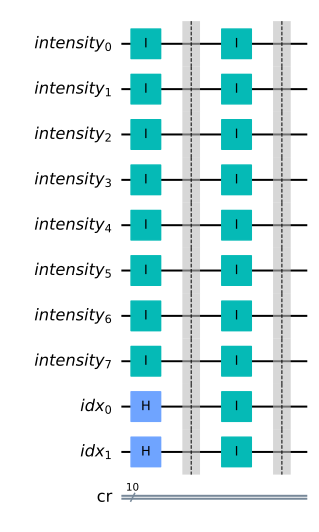

In [16]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

次に2番目のピクセルで位置が(0,1)、値が(01010101)のピクセルをエンコードしていきます。ここでコントロールビットが2つある制御NOTゲート(2-CNOT)を利用します。ピクセル位置(Y,X)によって制御され、ピクセル値を表現する$C^{i}_{YX}$の量子ビットがターゲットビットとして回転します。

**注意** ここではCNOTゲートが作用するのは制御ビットの状態が0と1の状態の組みになっている場合にしたいので、回路の前後にXゲートを置くことで、特定の制御ビットの状態が0のときでも制御操作が作用するようにしています。 

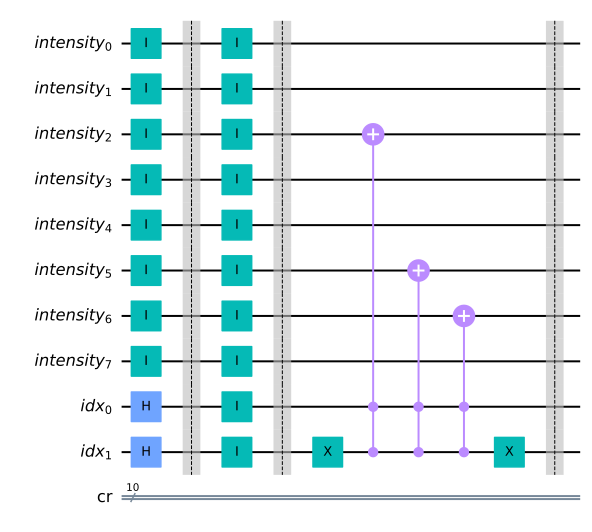

In [17]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw()

次のピクセルに移ります。位置は(1,0)、値は(10101010)です。

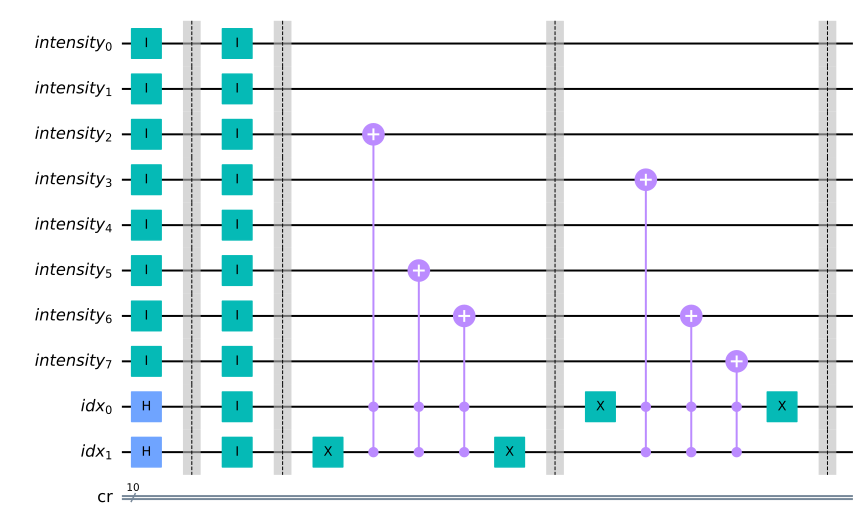

In [18]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

最後のピクセルです。位置は(1,1)、値は(11111111)です。全てのピクセル画像値の量子ビットに単にトフォリゲートを追加するだけです。 

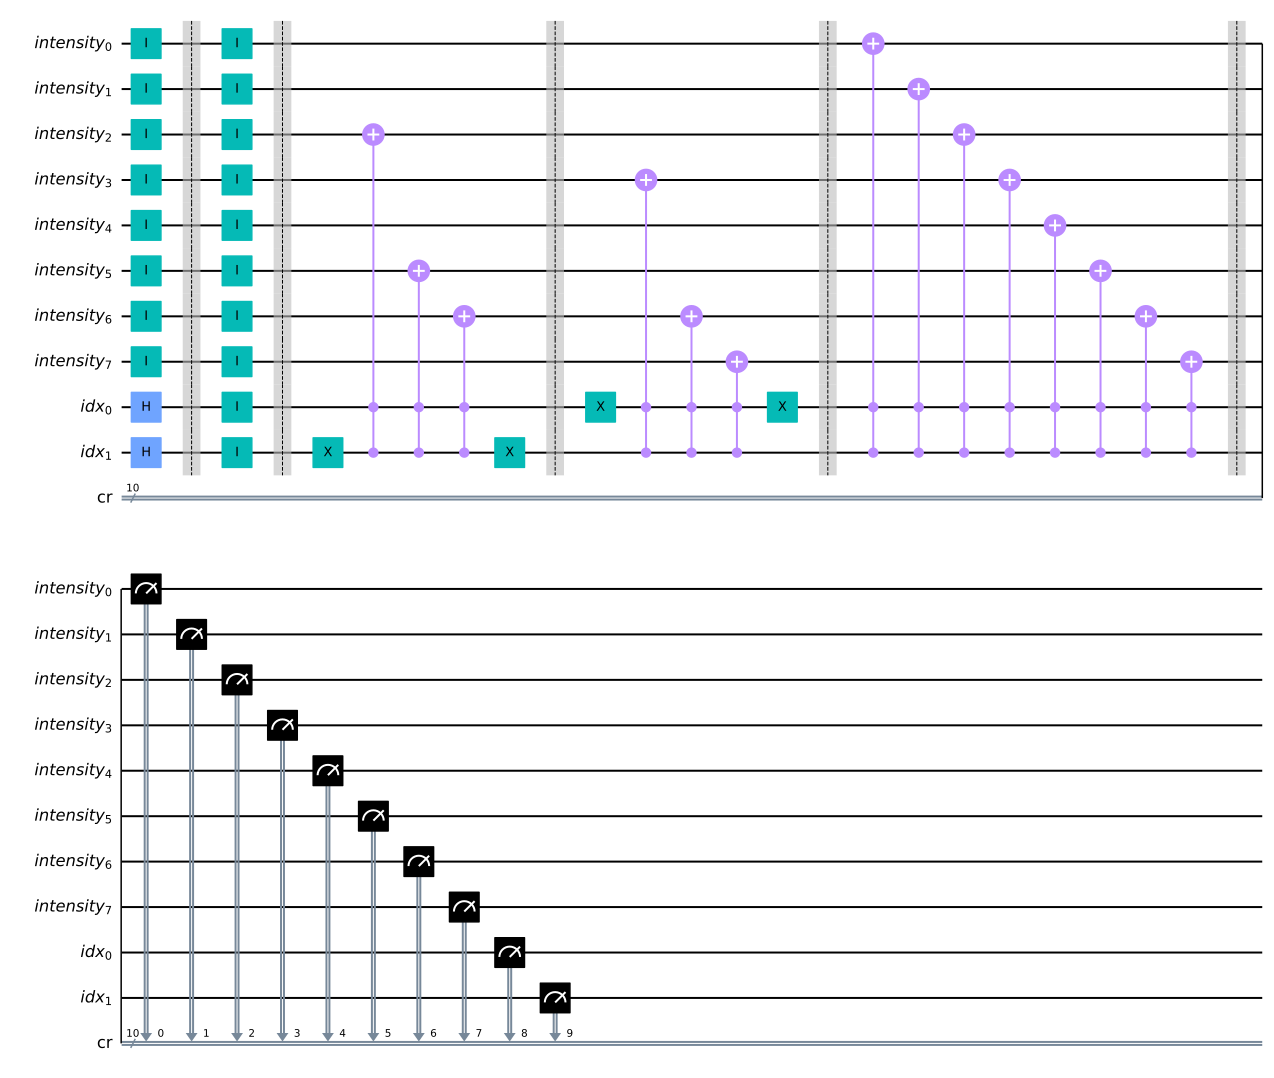

In [19]:
# Encode the third pixel whose value is (11111111):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

おめでとうございます！2×2のグレースケール画像をエンコードすることが出来ました！それではこれまでやってきたことといくつかの注意点を振り返っていきましょう。

### 2.3 回路の分析

画像のエンコードが終ったので回路の分析をしていきます。まず回路中で使用したゲートの総数を見てみましょう。decompose関数を利用することで利用しているゲートを基本ゲートに焼きなおすことができます。

回路の深さとサイズ、演算の回数を出力します。 

In [20]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  148
Circuit size:  244


OrderedDict([('cx', 84),
             ('t', 56),
             ('tdg', 42),
             ('h', 28),
             ('id', 18),
             ('measure', 10),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

#### 回路の分解

いくつか驚く点があるかもしれません。1点目に最も驚くべきこととして、回路の深さが150程度(場合によりますが)である点です。上で見た最後の回路の深さが20程度(測定操作は除く)なのとは対照的です。<br>この理由は利用しているゲート、特にマルチ制御ゲートが基底ゲートに分解する際に回路の深さを非常に大きくしてしまい得るからです。

#### 回路の最適化

幸運なことにQiskitではマルチ制御ゲートを最小限のゲート数で構築するための様々なオプティマイザーがあります[REF: PassManager]。オプティマイザーは選択された量子ビットがエラー率最小となる接続になるように最適化することもできます[REF: Optimization-Levels]。これらのオプティマイザーのおかげで自力よりも非常に速く最適解を見つけることができます！


### 2.4 Aerシミュレータ上での実行

近い将来の量子コンピューターの全てにおいて回路の分析の節で導いた回路の深さや、必要とする2量子ビットゲートの数を考えると、量子ボリュームの小さいデバイスで実行した場合はきわめてノイズが多く、非常に有用なデータが期待されます。量子回路を実行する場合はこのことを念頭に、可能な場合は結果からノイズを最小化してみてください。

Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'0101100100': 2003, '0000000000': 2055, '1011001000': 2119, '1111111111': 2015}


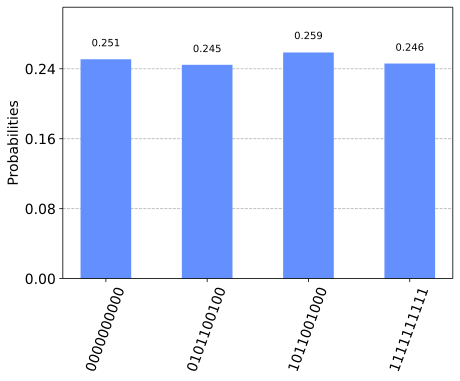

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)

### 結果の解析

上の結果を見ると、ピクセル位置は最初の左から二つの量子ビット(00,01,10,11)で表され、残りの量子ビットは以下のようにエンコードされたグレースケール強度の8ビットバイナリ表現を表しています。

エンコード: **00** = 00000000,<br>エンコード: **01** = 01100100,<br>エンコード: **10** = 11001000,<br>エンコード: **11** = 11111111 

### 2.5 量子画像回路の圧縮

ご覧のように、深さが127でサイズが264の量子回路は非常に大きく深いです！<br>言うまでもなく全く効率的ではありません。当然回路の深さを削減し、より少ない演算子で画像を圧縮する方法はあります。一つにはIBMのBraytonにより考案されたEspressoアルゴリズム[8]などの古典圧縮アリゴリズムを用いることです。Espressoアルゴリズムは回路内の全てのCNOTゲートの情報を圧縮して最小化する際に用いられます。

このアルゴリズムがどのように動くかというと、各ピクセルのゲート群は二つのグループに分けられます。ピクセル値を表現するために、一つはピクセル値が1のときCNOTゲートを持つグループで、ピクセル値が0のときIゲートを持つグループです。例えば入りが(0,1)の2番目のピクセルでは4つのCNOTゲートが存在します。各グループ$\phi_{i}$は以下のように表現することが出来ます。

$$\phi_{i} = (\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=0}^{2^{n}-1} I) \cup (\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=1}^{2^{n}-1} (2n - CNOT)_{YX}))\label{eq:expresso_separated} \tag{2.3}$$

$\bigcup$ は以下のように2つのグループの全ての位置と色の値の表現を合わせたものです。

左のグループはIゲートのグループを表現していて、 $C^{i}_{YX}=0$ のときIゲートが使われます。Iゲートは回路に影響を及ぼさないので左のグループは無視することが出来ます。

右のグループは制御NOTゲートのグループを表現していて、 $C^{i}_{YX}=1$ のときCNOTゲートが使われます。

故に、Espressoアルゴリズムは下の数式で表すように制御NOTゲートを最小化する際に用いられます。

$$\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=1}^{2^{n}-1} YX \xrightarrow[]{\text{Espresso}} \bigcup_{K_i}K_i \label{eq:compressed_circuit} \tag{2.4}$$ 

$\bigcup_{K_i}K_i$ は制御NOTゲートの最小値を表しています。

## まとめ

この節ではデジタル画像用の新しい拡張量子表現アルゴリズム(NEQR)、そして量子系において画像を表現するために制御NOTゲートをどのように利用するかを扱いました。また、Espressoアルゴリズムを使って量子画像表現の回路の深さを削減する形式についても扱いました。これは量子回路内の制御ゲートの数を最小化して量子コンピューター上で実行するために使われます。 [7]

量子系での画像表現の考えられる優位性は、画像検索のための量子並列性 [9]や特徴抽出[10]、画像のセグメンテーション[11]などいかなる画像処理も高速化する能力を秘めているということです。画像分類 [12]や画像認識[13]その他さまざまな画像処理技術 [6]など、たくさんの画像処理操作が組み込まれた機械学習アルゴリズムが様々存在します。量子画像処理と量子機械学習の組み合わせは古典系では困難な問題、特に医療画像処理や地理情報システムの画像、画像復元など大量の画像処理を必要とする様々なドメインにおける問題を解決できる可能性を秘めています。


## 練習問題

1. 2×2画像のピクセル値 [101], [011], [111], [000]が与えられたとき、画像を表現する量子回路を構築するpython関数を記述してください。（ヒント:5量子ビットの回路を構築する必要があります。）

2. 上で構築した回路を使ってピクセル値を変換してください。


## 参考文献

[1] Le, P.Q., Dong, F. &amp; Hirota, K. A flexible representation of quantum images for polynomial preparation, image compression, and processing operations. Quantum Inf Process 10, 63–84 (2011). https://doi.org/10.1007/s11128-010-0177-y

[2] Le, Phuc Quang, Fayang Dong and Kaoru Hirota. “Flexible Representation of Quantum Images and Its Computational Complexity Analysis.” (2009). https://doi.org/10.14864/fss.25.0.185.0

[3] Y. Zhang, K. Lu, and Y. Gao, Qsobel: A Novel Quantum Image Edge Extraction Algorithm, Sci. China Inf. Sci. 58, 1-13 (2015). http://engine.scichina.com/doi/pdf/62784e3238b8457bb36f42efc70b37d2

[4] Xi-Wei Yao, Hengyan Wang, Zeyang Liao, Ming-Cheng Chen, Jian Pan, Jun Li, Kechao Zhang, Xingcheng Lin, Zhehui Wang, Zhihuang Luo, Wenqiang Zheng, Jianzhong Li, Meisheng Zhao, Xinhua Peng, Dieter Suter, Quantum Image Processing and Its Application to Edge Detection: Theory and Experiment. https://arxiv.org/abs/1801.01465

[5] Zhang, Y., Lu, K., Gao, Y. et al. *NEQR: a novel enhanced quantum representation of digital images.* Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[6] Cai,Yongquan et al. *A Survey on Quantum Image Processing.* Chinese Journal of Electronics(2018), 27 (4):718_ http://dx.doi.org/10.1049/cje.2018.02.012

[7] “Qiskit: An open-source framework for quantum computing,”  (2019). https://qiskit.org

[8] Brayton, R.K. Sangiovanni-Vicentelli, A. McMullen, C. Hacktel, G.: *Log Minimization Algorithms VLSI Synch*. Kluwer Academic Publishers, DOrdrecht (1984)

[9] L.K. Grover, “A fast quantum mechanical algorithm for database search”, In Proceedings of the 28th Annual ACM Symposium on the Theory of Computing, pp. 212–219, (1996)

[10] Y. Zhang, K. Lu, K. Xu, Y. Gao, and R. Wilson. 2015. “Local feature point extraction for quantum images”, Quantum Information Processing vol. 14, no. 5, pp. 1573–1588, (2015)

[11] Y. Ruan, H. Chen, J. Tan, and X. Li. “Quantum computation for large-scale image classification”, Quantum Information Processing, vol. 15, pp. 4049–4069, July (2016)

[12] Dang, Y., Jiang, N., Hu, H., Ji, Z., &amp; Zhang, W. (2018). Image Classification Based on Quantum KNN Algorithm. ArXiv, abs/1805.06260.

[13] Kerenidis, I., Landman, J. and Prakash, A., 2019. Quantum algorithms for deep convolutional neural networks. arXiv preprint arXiv:1911.01117


In [22]:
import qiskit.tools.jupyter
%qiskit_version_table